[14:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
             feature  importance
18             C_pix    0.264637
5       app_category    0.103361
8                C18    0.073980
19   C_device_type_1    0.065261
3      site_category    0.052403
16     C_site_domain    0.052253
15         C_site_id    0.047706
4         app_domain    0.047704
11               C21    0.047077
6   device_conn_type    0.041970
14          C_app_id    0.037602
13         is_device    0.035304
2         banner_pos    0.031451
9                C19    0.020131
10               C20    0.019257
7                C14    0.018555
17    C_device_model    0.013225
12               day    0.010588
1               hour    0.009585
0                 id    0.0079

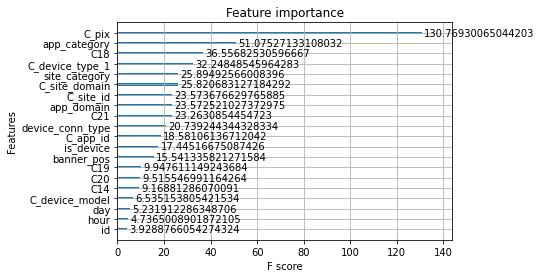

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score #评估指标
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import plot_importance

train = pd.read_csv('D:/数据中间处理结果/avazu/tr_FE.csv')


y_train = train.click
X_train = train.drop(['click', 'device_ip', 'Unnamed: 0'], axis = 1)

#X_test = loadTestData(testFilePath)

model = xgb.XGBRegressor(n_estimators=350, max_depth=10, objective='binary:logistic', min_child_weight=50,
                         subsample=0.8, gamma=0, learning_rate=0.2, colsample_bytree=0.5, seed=27)

model.fit(X_train, y_train)
# y_test = model.predict(X_test)
plot_importance(model, importance_type="gain")

features = X_train.columns
feature_importance_values = model.feature_importances_

feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importance_values})

feature_importances.sort_values('importance', inplace=True, ascending=False)
print(feature_importances)

# print(model.get_booster().get_fscore())

print(model.get_booster().get_score(importance_type="gain"))







In [2]:
feature_importances.to_csv('D:/数据中间处理结果/avazu/feature.csv')